<a href="https://colab.research.google.com/github/nishusingh11/python-scripting-for-social-science/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### BDA 572-01 Final Project : By Nishu Singh(826691926) and Parul Jain(825191465)

## Multi-Class Text Classification on 'All the News' dataset


## 1. About the Dataset

We are working on "All the news" dataset, which is provided by Prof. Mark Gawron. It contains columns like title, publication, authors, date etc. This dataset contains 150000 articles. 

Dataset is also available on kaggle. 

## 2. Goal

Our goal is to use the title attribute, tokenize the data and to predict the publication name. This problem is multiclass text classification. For this project, we have chose six publication which are: 'NPR', 'New York Post', 'Breitbart','CNN','Washington Post','Reuters'. 

The total number of articles after preprocessing are : 86577

In [ ]:
# Importing Libraries

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing import text, sequence
from sklearn.model_selection import GridSearchCV
import warnings
import seaborn as sns
import numpy as np
import time
warnings.filterwarnings('ignore')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nishu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 3. Data Pre-processing (Done by Nishu and Parul)

Concatenating the comma separated file using concat method to prepare the final data.

In [ ]:
df = pd.concat(
    map(pd.read_csv, ['articles1.csv', 'articles2.csv','articles3.csv']), ignore_index=True)

#### Counting the number of title in each publication

In [ ]:
publication_count = df.groupby('publication').size().reset_index(name='counts')
publication_count.sort_values(by='counts', ascending=False, inplace=True)
publication_count[:10]

,publication,counts
1,Breitbart,23781
9,New York Post,17493
7,NPR,11992
4,CNN,11488
14,Washington Post,11114
11,Reuters,10710
6,Guardian,8681
10,New York Times,7803
0,Atlantic,7179
2,Business Insider,6757


#### Selecting the 6 highest publications as multi-class label

In [ ]:
publications = ['NPR', 'New York Post', 'Breitbart','CNN','Washington Post','Reuters']

In [ ]:
# Printing the req_data 
req_data = df[df['publication'].isin(publications)][['title','publication']]
req_data

,title,publication
7803,CNN’s Zeleny: ’Hard to Imagine’ Obama Would Ha...,Breitbart
7804,American Students on Spring Break Chant ’Build...,Breitbart
7805,Surge in ’Honour Crimes’ and Forced Marriages ...,Breitbart
7806,MILO Announces New Media Venture - Breitbart,Breitbart
7807,Jared Kushner at Center of Media Spotlight on ...,Breitbart
...,...,...
142565,An eavesdropping Uber driver saved his 16-year...,Washington Post
142566,Plane carrying six people returning from a Cav...,Washington Post
142567,After helping a fraction of homeowners expecte...,Washington Post
142568,"Yes, this is real: Michigan just banned bannin...",Washington Post


In [ ]:
# Dropping all na's from the dataset. 
req_data.dropna(inplace=True)
req_data.shape

(86577, 2)

#### Final input and output feature

In [ ]:
x = req_data['title']
y = req_data['publication']

In [ ]:
# Printing the input data
x

7803      CNN’s Zeleny: ’Hard to Imagine’ Obama Would Ha...
7804      American Students on Spring Break Chant ’Build...
7805      Surge in ’Honour Crimes’ and Forced Marriages ...
7806           MILO Announces New Media Venture - Breitbart
7807      Jared Kushner at Center of Media Spotlight on ...
                                ...                        
142565    An eavesdropping Uber driver saved his 16-year...
142566    Plane carrying six people returning from a Cav...
142567    After helping a fraction of homeowners expecte...
142568    Yes, this is real: Michigan just banned bannin...
142569    What happened in Washington state after voters...
Name: title, Length: 86577, dtype: object

#### Plotting th selected 6 publications with total number of titles

Text(0, 0.5, 'Publication')

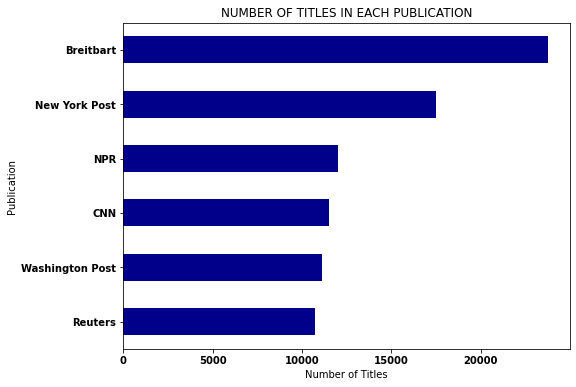

In [ ]:
fig = plt.figure(figsize=(8,6))
colors = ['darkblue']*9
req_data.groupby('publication').title.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF TITLES IN EACH PUBLICATION')
plt.xlabel('Number of Titles', fontsize = 10)
plt.ylabel('Publication', fontsize = 10)

#### Plotting the Word Cloud of each publications

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it's important. (source wiki)

In [ ]:
# Preparing the data for each publication by concatenating all the words in lower case and 
# store in respective variable.

npr = ''.join(req_data[req_data['publication']=='NPR'].title).lower()
nyp = ''.join(req_data[req_data['publication']=='New York Post'].title).lower()
brt = ''.join(req_data[req_data['publication']=='Breitbart'].title).lower()
cnn = ''.join(req_data[req_data['publication']=='CNN'].title).lower()
wp = ''.join(req_data[req_data['publication']=='Washington Post'].title).lower()
re = ''.join(str(req_data[req_data['publication']=='Reuters'].title)).lower()

In [ ]:
# List if all publications
wc_publications = [npr, nyp, brt, cnn, wp, re]

In [ ]:
# Defining the function to prepare and return the wordcloud
def word_cloud(publication): 
    stop_words = ['will','S','U'] + list(STOPWORDS)
    wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000).generate(publication)
    return wordcloud

<Figure size 2880x17280 with 0 Axes>

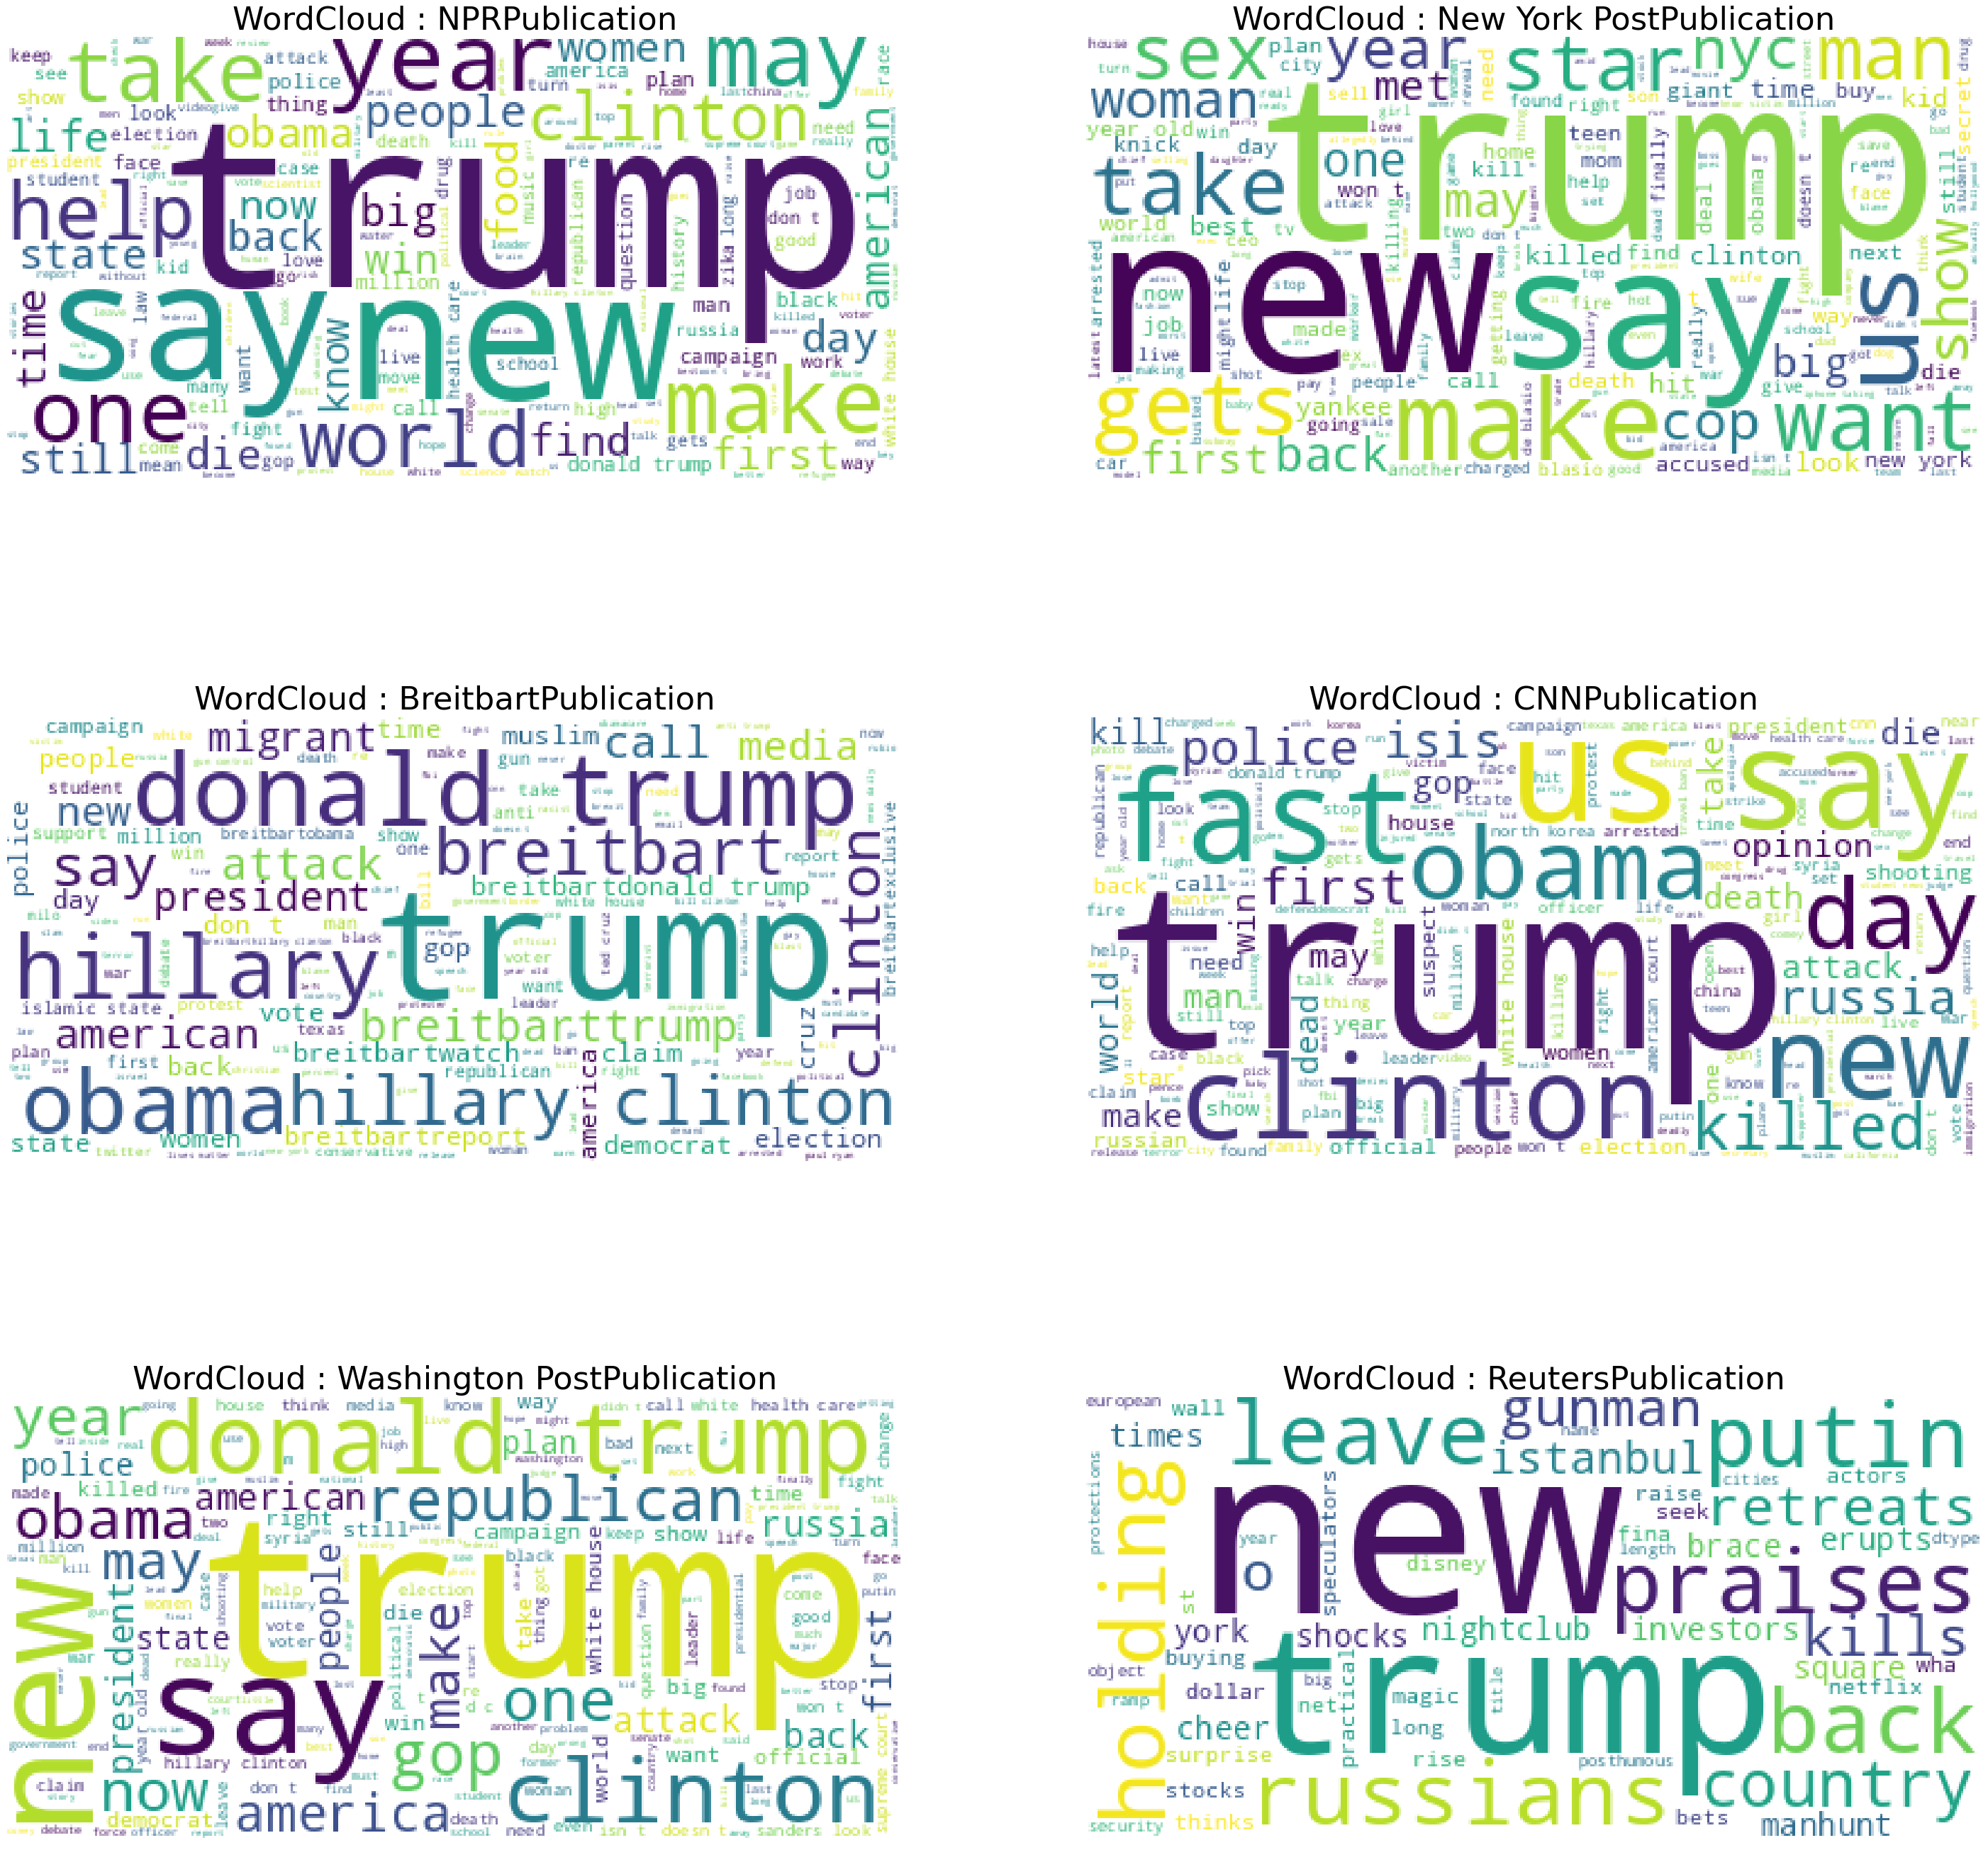

<Figure size 432x288 with 0 Axes>

In [ ]:
# Below is the code to print the wordcloud for all publications

nr_rows = 3
nr_cols = 2

r=c=0


plt.figure(figsize = (40, 240))
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(50,50))

fig = plt.figure()
for i in range(len(wc_publications)):
    wordcloud = word_cloud(wc_publications[i])

    axs[r][c].imshow(wordcloud)
    axs[r][c].axis('off')
    axs[r][c].set_title('WordCloud : '+ publications[i] +'Publication',size=45)
    
    if(i%2==0):
        c = 1
    elif(i%2==1):
        r = r+1
        c = 0

<b> **In above wordcloud plots we can see that all the publication has almost same words. It means if we will train the model on word analyzer will not perform good.

## 4. Feature Engineering             (Done by Nishu)

This phase involves transforming the raw text data into features vector and we can create new fetures using existing features as well. In order to extract useful features from our dataset, I've implemented following techniques. Later, I will compare all of them and then proceed the model training with the one which is giving best result. (Took reference from https://towardsdatascience.com/)

### Split the data

Splitting the train test data

In [ ]:
# Splitting the data into training and testing set
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(x, y)

### Encoding

Performing Label encoder to encode our target data so that we can use it for model training.

In [ ]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

### Using Count Vector technique to create features

Convert a collection of text documents to a matrix of token counts.       (source sklearn website)

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(x)

# Transforming the training and testing data using CountVectorizer module.
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

### Using TF-IDF Vector technique 

TF-IDF vectors can be generated three levels of input tokens:

Word level TF-IDF : Matrix represent the tf-idf score for every word.

N-gram level TF-IDF : This is the combination of N words together in the document and marix represent the tf-idf score of N grams.

Character level TF-IDF : Matrix represent the tf-idf score for characters.

In [ ]:
# 1. Creating feature based on word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(x)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# 2. Creating feature based on ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(x)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# 3. Creating feature based on characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(x)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

### Model Building based on various features

In this step I will train Multinomial Naive Bayes, Logistic Regression, Support Vector Machine and Randon Forest Classifier. The model training is done on Count vector, Word level vector, N-gram vector and Character level vector. Then I compared the performance of all the feature vectors. In my case Character level vector is performing better then others so again we trained models on character level vector for better accuracy.

#### Defining function for prediction

In [ ]:
# Function for fitting the tarined dataset and calulate the accuracy of the algorithm.
# parameters are: Name of the classifier, trained feature, trained target, test feature

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    
    # fit the train
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on test dataset
    predictions = classifier.predict(feature_vector_valid)
    
    # return the accuracy metrics
    return metrics.accuracy_score(predictions, valid_y)

#### Multinomial Naive Bayes

In [ ]:
# Calling the train_model funtion to calculate and printing the accuracy of the models.
# Naive Bayes on Count Vectors

accuracy_nb_cv = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy_nb_cv)

# Naive Bayes on Word Level TF IDF Vectors
accuracy_nb_wlv = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy_nb_wlv)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_nb_ngv = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy_nb_ngv)

# Naive Bayes on Character Level TF IDF Vectors
accuracy_nb_clv = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy_nb_clv)

NB, Count Vectors:  0.6064680064680065
NB, WordLevel TF-IDF:  0.5662277662277663
NB, N-Gram Vectors:  0.43515823515823515
NB, CharLevel Vectors:  0.6745206745206745


#### Logistic Regression 

In [ ]:
# Calling the train_model funtion to calculate and printing the accuracy of the models.
# Linear Classifier on Count Vectors

accuracy_lr_cv = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy_lr_cv)

# Linear Classifier on Word Level TF IDF Vectors
accuracy_lr_wlv = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy_lr_wlv)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_lr_ngv = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy_lr_ngv)

# Linear Classifier on Character Level TF IDF Vectors
accuracy_lr_clv = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy_lr_clv)

LR, Count Vectors:  0.6470316470316471
LR, WordLevel TF-IDF:  0.6364056364056364
LR, N-Gram Vectors:  0.45137445137445137
LR, CharLevel Vectors:  0.7541695541695542


#### Linear Support Vector Classifier

In [ ]:
# Calling the train_model funtion to calculate and printing the accuracy of the models.
# Linear Support Vector Classifier on Count Vectors.

accuracy_svc_cv = train_model(svm.LinearSVC(), xtrain_count, train_y, xvalid_count)
print("SVM, Count Vectors: ", accuracy_svc_cv)

# SVM on Word Level TF IDF Vectors
accuracy_svc_wlv = train_model(svm.LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM, WordLevel TF-IDF: ", accuracy_svc_wlv)

# SVM on Ngram Level TF IDF Vectors
accuracy_svc_ngv = train_model(svm.LinearSVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy_svc_ngv)

# SVM  on Character Level TF IDF Vectors
accuracy_svc_clv = train_model(svm.LinearSVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("SVM, CharLevel Vectors: ", accuracy_svc_clv)

SVM, Count Vectors:  0.6166782166782167
SVM, WordLevel TF-IDF:  0.6309540309540309
SVM, N-Gram Vectors:  0.44425964425964426
SVM, CharLevel Vectors:  0.7598521598521598


#### Random Forest Classifier

In [ ]:
# Calling the train_model funtion to calculate and printing the accuracy of the models.
# Randon Forest Classifier on Count Vectors.
# Random Forest classifier will takes around 5-7 minutes to print the accuracy. 

accuracy_rf_cv = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy_rf_cv)

# RF on Word Level TF IDF Vectors
accuracy_rf_wlv = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy_rf_wlv)

# RF on Ngram Level TF IDF Vectors
accuracy_rf_ngv = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ", accuracy_rf_ngv)

# RF on Character Level TF IDF Vectors
accuracy_rf_clv = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("RF, CharLevel Vectors: ", accuracy_rf_clv)


RF, Count Vectors:  0.5863709863709864
RF, WordLevel TF-IDF:  0.5831831831831832
RF, N-Gram Vectors:  0.4216678216678217
RF, CharLevel Vectors:  0.7165165165165165


### Comparing the performance of models on different feature vectors (Done by Nishu)

Below is the code to plot the performance of the models based on count vector, word level vector, N-gram vector and Character level vector. 

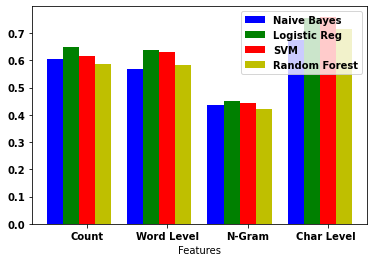

In [ ]:
# Potting the grouped bars to check the performace of models.
X = ['Count','Word Level','N-Gram','Char Level ']
x=np.arange(len(X))

# Storing the accuracies of Naive Bayes in nb, accuracies of Logistic
# Regression on lr, accuracies of linear support vector classifier on svm,
# accuracies of random forest on rf.

nb = [accuracy_nb_cv,accuracy_nb_wlv,accuracy_nb_ngv,accuracy_nb_clv]
lr = [accuracy_lr_cv,accuracy_lr_wlv,accuracy_lr_ngv,accuracy_lr_clv]
svm = [accuracy_svc_cv, accuracy_svc_wlv, accuracy_svc_ngv, accuracy_svc_clv ]
rf = [accuracy_rf_cv, accuracy_rf_wlv, accuracy_rf_ngv,accuracy_rf_clv ]


ax = plt.subplot(1,1,1)


ax.bar(x-0.4, nb, width=0.2, color='b', align='center')
ax.bar(x-0.2, lr, width=0.2, color='g', align='center')
ax.bar(x, svm, width=0.2, color='r', align='center')
ax.bar(x+0.2, rf, width=0.2, color='y', align='center')
plt.xlabel('Features')
plt.xticks(x, X)
plt.legend(('Naive Bayes', 'Logistic Reg', 'SVM', 'Random Forest') )
plt.show()

<b>**Based on the above plot we can clearly see that using character level vector is performing better. So based on this, we are continuing model builing on character level vector feature.

## 5. Model Training using character level vectorizer feature (Done by Nishu and Parul)

Training the Naive Bayes, Linear support vector, Logistic regression and Random forest using the character level feature. 

In [ ]:
# creating classifiers instance
svm_clf = svm.LinearSVC()
nb_clf = naive_bayes.MultinomialNB() 
rf_clf = ensemble.RandomForestClassifier() 
logistic_clf = linear_model.LogisticRegression(random_state=0)


#### Splitting the train test data and Initializing the train and test character level vectorizer 

In [ ]:
# splitting data into training and testing set
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.1, random_state = 23)

# Character level vectorizer instance 
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_test)

#### Defining fit_and_predict function


In [ ]:
# Creating function to fit and print the classification report
# Inputs of the fuctions are: trained input, trained target variable, 
# classifier, test input and test target.


def fit_and_predict(x_train, y_train, clf, X_test, y_test):
    
    clf = clf.fit(x_train, y_train)
    predicted = clf.predict(X_test)
    
    c1= metrics.classification_report(y_test, predicted, 
                                    target_names= y.unique())
    
    c= metrics.classification_report(y_test, predicted, 
                                    target_names= y.unique(),output_dict=True)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(pd.DataFrame(c).iloc[:-1, :].T, annot=True, linewidths=1)
    
    # Returning classifie and classification report
    return clf,c1

#### Linear Support Vector Classifier

SVM Classifier
                 precision    recall  f1-score   support

      Breitbart       0.87      0.87      0.87      2362
            CNN       0.62      0.66      0.64      1130
  New York Post       0.60      0.52      0.55      1232
            NPR       0.99      0.98      0.99      1808
        Reuters       0.66      0.75      0.70      1038
Washington Post       0.63      0.62      0.62      1088

       accuracy                           0.77      8658
      macro avg       0.73      0.73      0.73      8658
   weighted avg       0.77      0.77      0.77      8658

Time taken to make predictions :  5.026063680648804 seconds


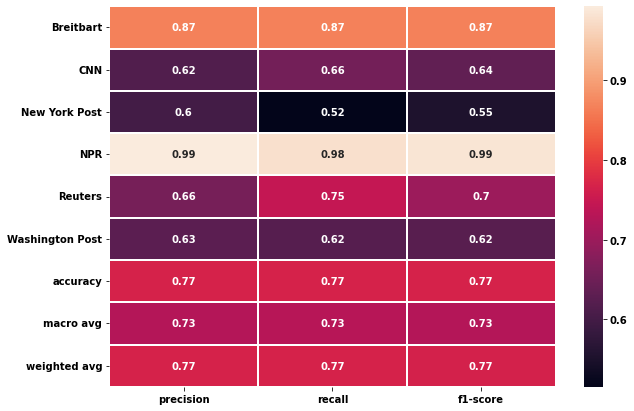

In [ ]:
# In below code, we are printing and plotting the support vector classifier's classification report for better visualization.
# Also print the computational time taken by the classifier.

print('SVM Classifier')
start = time.time()
svm_clf,c = fit_and_predict(xtrain_tfidf_ngram_chars, y_train,svm_clf, xvalid_tfidf_ngram_chars, y_test)
print(c)
print("Time taken to make predictions : ", time.time()-start, 'seconds')


#### Multinomial Naive Bayes Classifier

Naive Bayes Classifier
                 precision    recall  f1-score   support

      Breitbart       0.73      0.86      0.79      2362
            CNN       0.48      0.29      0.36      1130
  New York Post       0.55      0.46      0.50      1232
            NPR       0.80      0.97      0.87      1808
        Reuters       0.60      0.66      0.63      1038
Washington Post       0.60      0.47      0.53      1088

       accuracy                           0.68      8658
      macro avg       0.63      0.62      0.61      8658
   weighted avg       0.66      0.68      0.66      8658

Time taken to make predictions :  0.5690960884094238 seconds


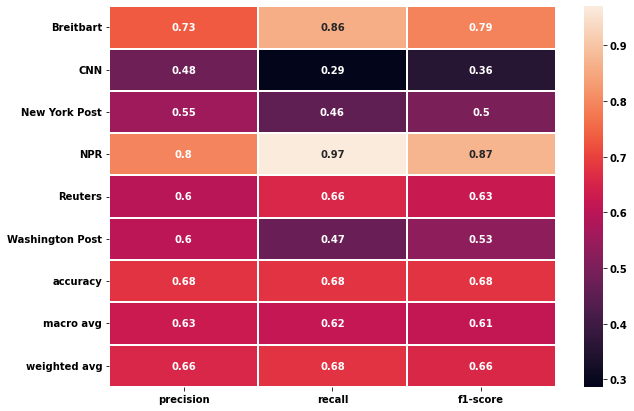

In [ ]:
# In below code, we are printing and plotting the Naive Bayes classifier's classification report for better visualization.
# Also print the computational time taken by the classifier.

print('Naive Bayes Classifier')
start = time.time()
nb_clf,c = fit_and_predict(xtrain_tfidf_ngram_chars, y_train, nb_clf, xvalid_tfidf_ngram_chars, y_test)
print(c)
print("Time taken to make predictions : ", time.time()-start, 'seconds')

#### Logistic Regression Classifer

Logistic Regression Classifier
                 precision    recall  f1-score   support

      Breitbart       0.86      0.85      0.86      2362
            CNN       0.60      0.65      0.62      1130
  New York Post       0.57      0.51      0.54      1232
            NPR       0.99      0.97      0.98      1808
        Reuters       0.65      0.72      0.68      1038
Washington Post       0.61      0.60      0.60      1088

       accuracy                           0.75      8658
      macro avg       0.71      0.72      0.71      8658
   weighted avg       0.76      0.75      0.75      8658

Time taken to make predictions :  26.86076807975769 seconds


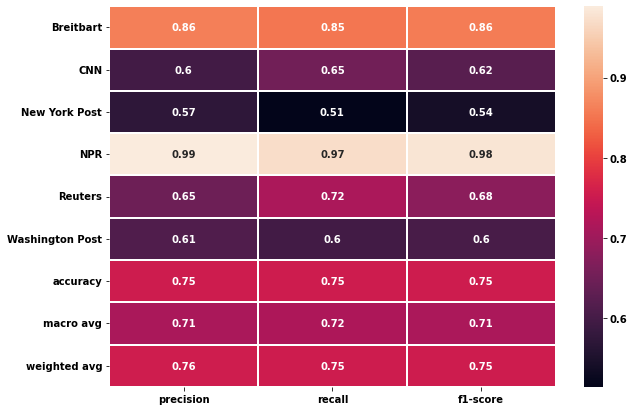

In [ ]:
# In below code, we are printing and plotting the Logistic regression's  classification report for better visualization.
# Also print the computational time taken by the classifier.

print('Logistic Regression Classifier')
start = time.time()
logistic_clf,c = fit_and_predict(xtrain_tfidf_ngram_chars, y_train, logistic_clf, xvalid_tfidf_ngram_chars, y_test)
print(c)
print("Time taken to make predictions : ", time.time()-start, 'seconds')

#### Random Forest Classifier

The computation time for random forest is high. I've commented the below code but if you want to execute uncomment the below code.

Output is mentioned below

Random Forest Classifier
                 precision    recall  f1-score   support

      Breitbart       0.89      0.79      0.84      2362
            CNN       0.56      0.69      0.62      1130
  New York Post       0.51      0.48      0.49      1232
            NPR       0.92      0.98      0.95      1808
        Reuters       0.59      0.63      0.61      1038
Washington Post       0.61      0.53      0.57      1088

       accuracy                           0.72      8658
      macro avg       0.68      0.68      0.68      8658
   weighted avg       0.73      0.72      0.72      8658

Time taken to make predictions :  614.0538947582245 seconds


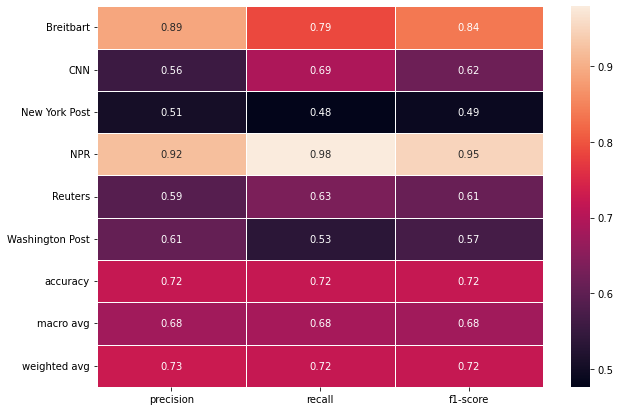

In [ ]:
# print('Random Forest Classifier')
# start = time.time()
# knn_clf,c = fit_and_predict(xtrain_tfidf_ngram_chars, y_train, rf_clf, xvalid_tfidf_ngram_chars, y_test)
# print(c)
# print("Time taken to make predictions : ", time.time()-start, 'seconds')

## 6. Grid Search Cross Validation (Done by Parul)

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. (source wikipedia).

In this project we have done grid search cross validation for better result.

#### Initializing the classifiers

In [ ]:
# creating classifiers instance

svm_clf = svm.LinearSVC()                            # Linear Support Vector Classifier
nb_clf = naive_bayes.MultinomialNB()                 # Multinomial Naive Bayes Classifier
rf_clf = ensemble.RandomForestClassifier()           # Random Forest Classifier
logistic_clf = linear_model.LogisticRegression(random_state=0)    # Logistic Regression Classifier

#### Defining function to get the best parameters of the model

In [ ]:
# fitting the train model to get the best parameters of the model using grid_search.best_params
def grid_search_fit(clf, param, cv, X_train, y_train):
    grid_search = GridSearchCV(clf, param_grid=param, cv=cv)
    grid_search.fit(X_train, y_train)
    
    # returing the fitted grid search model and best parameters
    return grid_search, grid_search.best_params_

#### grid_predict fucntion to get the classification report of the model

In [ ]:
# The code of prediction and calculate th eclassfication report is written below.
# Plotting the heatmap using seaborn library.

def grid_predict(grid,X_test, y_test):
    grid_predictions = grid.predict(X_test)
    
    c1= metrics.classification_report(y_test, grid_predictions, 
                                    target_names= y.unique())
    
    c= metrics.classification_report(y_test, grid_predictions, 
                                    target_names= y.unique(),output_dict=True)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(pd.DataFrame(c).iloc[:-1, :].T, annot=True, linewidths=1)
    
    return c1

#### Hypertuning the parameters of Multinomial Naive Bayes classifier 

{'alpha': 0.01}
                 precision    recall  f1-score   support

      Breitbart       0.75      0.86      0.80      2362
            CNN       0.47      0.31      0.37      1130
  New York Post       0.56      0.47      0.51      1232
            NPR       0.81      0.99      0.89      1808
        Reuters       0.61      0.66      0.63      1038
Washington Post       0.61      0.48      0.54      1088

       accuracy                           0.69      8658
      macro avg       0.63      0.63      0.62      8658
   weighted avg       0.66      0.69      0.67      8658



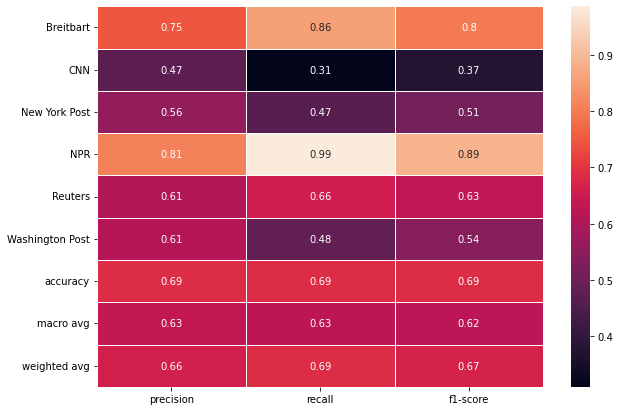

In [ ]:
# Multinominal Naive Bayes
nb_parameters = { 'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

nb_gs, nb_params = grid_search_fit(nb_clf, nb_parameters, 3, xtrain_tfidf_ngram_chars, y_train)
print(nb_params)
print(grid_predict(nb_gs,xvalid_tfidf_ngram_chars, y_test))

#### Hypertuning the parameters of Linear Support Vector classifier 

{'C': 1}
                 precision    recall  f1-score   support

      Breitbart       0.87      0.87      0.87      2362
            CNN       0.62      0.66      0.64      1130
  New York Post       0.60      0.52      0.55      1232
            NPR       0.99      0.98      0.99      1808
        Reuters       0.66      0.75      0.70      1038
Washington Post       0.63      0.62      0.62      1088

       accuracy                           0.77      8658
      macro avg       0.73      0.73      0.73      8658
   weighted avg       0.77      0.77      0.77      8658



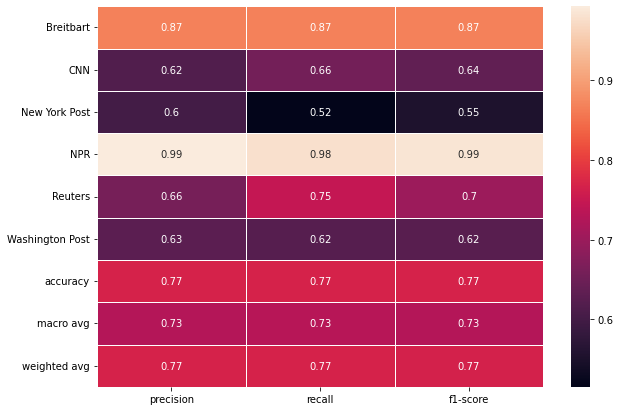

In [ ]:
# Linear Support vector classifier
#'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
svm_parameters = {'C': [0.1, 1, 10, 100, 1000]}    

svm_gs, svm_params = grid_search_fit(svm_clf, svm_parameters, 2, xtrain_tfidf_ngram_chars, y_train)

print(svm_params)
print(grid_predict(svm_gs,xvalid_tfidf_ngram_chars, y_test))

#### Hypertuning the parameters of Logistic Regression classifier 

{'C': 1.0}
                 precision    recall  f1-score   support

      Breitbart       0.86      0.85      0.86      2362
            CNN       0.60      0.65      0.62      1130
  New York Post       0.57      0.51      0.54      1232
            NPR       0.99      0.97      0.98      1808
        Reuters       0.65      0.72      0.68      1038
Washington Post       0.61      0.60      0.60      1088

       accuracy                           0.75      8658
      macro avg       0.71      0.72      0.71      8658
   weighted avg       0.76      0.75      0.75      8658



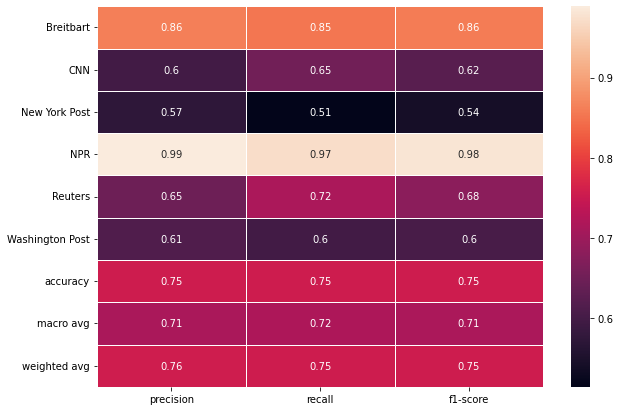

In [ ]:
# Logistic Regression Classifier
# 'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
# 'penalty' : ['none', 'l1', 'l2', 'elasticnet']
logistic_parameters = {'C' : [100, 10, 1.0, 0.1, 0.01]}
    
logistic_gs, logistic_params = grid_search_fit(logistic_clf, logistic_parameters, 2, xtrain_tfidf_ngram_chars, y_train)
print(logistic_params)
print(grid_predict(logistic_gs,xvalid_tfidf_ngram_chars, y_test))

#### Hypertuning the parameters of Random Forest classifier 

The computational time of random forest classifer is very high, this is the reason we've commented the below code. However, if you want to execute the code uncomment the below code.

The classification report is printed and plotted below.

{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
                 precision    recall  f1-score   support

      Breitbart       0.59      0.89      0.71      2362
            CNN       0.70      0.28      0.40      1130
  New York Post       0.69      0.10      0.18      1232
            NPR       0.47      0.98      0.64      1808
        Reuters       0.74      0.32      0.45      1038
Washington Post       0.80      0.19      0.31      1088

       accuracy                           0.56      8658
      macro avg       0.67      0.46      0.45      8658
   weighted avg       0.64      0.56      0.50      8658



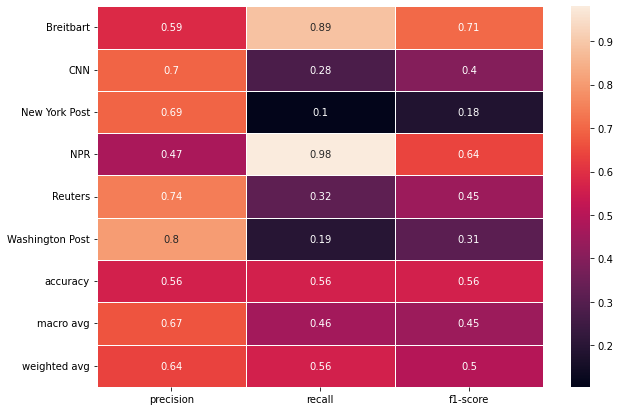

In [ ]:
# # Random Forest Classifier
# rf_parameters = {'bootstrap': [True],
#     'max_depth': [90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300]}

# rf_gs, rf_params = grid_search_fit(rf_clf, rf_parameters, 2, xtrain_tfidf_ngram_chars, y_train)
# print(rf_params)
# print(grid_predict(rf_gs,xvalid_tfidf_ngram_chars, y_test))


{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
                 precision    recall  f1-score   support

      Breitbart       0.59      0.89      0.71      2362
            CNN       0.70      0.28      0.40      1130
  New York Post       0.69      0.10      0.18      1232
            NPR       0.47      0.98      0.64      1808
        Reuters       0.74      0.32      0.45      1038
Washington Post       0.80      0.19      0.31      1088

       accuracy                           0.56      8658
      macro avg       0.67      0.46      0.45      8658
   weighted avg       0.64      0.56      0.50      8658

## 7. Results (Done by Nishu)

The following model performance are obtained in this project. As we've already plottted the claasification report (i.e precision, recall, fi-score). Here, I'm only comparing Accuracies.

#### Accuracy of model using Chracter level vector features without hyperparameters tuning

<table>
  
  <tr>
  <th> Model</th>
  <th> Accuracy</th>
  </tr>
<tr>
    <td>Multinomial Naive Bayes</td>
    <td>68%</td>
  </tr>
<tr>
    <td>Linear SVC</td>
    <td>77%</td>
  </tr>
    <tr>
    <td>Logistic Regression</td>
    <td>75%</td>
  </tr>
<tr>
    <td>Random Forest</td>
    <td>72%</td>
  </tr>  
</table>

#### Accuracy of model using Chracter level vector features with hyperparameters tuning

<table>
  
  <tr>
  <th> Model</th>
  <th> Accuracy</th>
  </tr>
<tr>
    <td>Multinomial Naive Bayes</td>
    <td>69%</td>
  </tr>
<tr>
    <td>Linear SVC</td>
    <td>77%</td>
  </tr>
    <tr>
    <td>Logistic Regression</td>
    <td>75%</td>
  </tr>
<tr>
    <td>Random Forest</td>
    <td>56%</td>
  </tr>  
</table>

## 8. Conclusion (Done by Nishu)

By using "All the news" dataset to predict the publicaion of the new by title can give upto <b>77 percent of accuracy</b>. This accuracy we are getting using feature based on <b>character level vectorizer on Linear support vector classifier</b>. 

However,  I've noticed there is no significant changes in performance after tunung the hyper-parameters on above models specially for random forest.

#### Fututre Work

I will try to improve performance by taking good number of parameters while tuning models paramaters. This time becuase of laptop configuration we couldn't include much paramaters, it was taking lot of computational time (2-3 hrs) to hypertune the paramaters.


## References:

https://scikit-learn.org/

https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

https://gawron.sdsu.edu/python_for_ss/course_core/wed_course_outline.html